1. https://realpython.com/k-means-clustering-python/
2. https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

In [39]:
import pandas as pd
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [40]:
# # If needed run and download NLTK Lib to run the code
# import nltk
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download("omw-1.4")
# # nltk.download("omw-1.4")

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
# df = pd.read_csv('/content/drive/MyDrive/DataSets/CNN_Articels_clean.csv')


In [43]:
df = pd.read_csv('../../../DataSets/CNN_Articels_clean.csv')


In [44]:
df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [45]:
final_df = df[["Category", "Description"]]

In [46]:
final_df.head()


,Category,Description
0,news,The e-commerce boom has exacerbated a global t...
1,news,Working in a factory can mean doing the same t...
2,news,"In a Hong Kong warehouse, a swarm of autonomou..."
3,business,"For many years, the world's most popular emerg..."
4,business,The European Union formally approved on Tuesda...


In [47]:
final_df.dropna(inplace=True)

C:\Users\sunil\AppData\Local\Temp\ipykernel_22628\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [8]:
final_df["Description_token"] = [word_tokenize(
    post) for post in final_df['Description']]


C:\Users\sunil\AppData\Local\Temp\ipykernel_22628\1791102100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Description_token"] = [word_tokenize(


In [9]:
post_new = []
for each_row in final_df["Description_token"]:
    post_new.append( [v for v in each_row if v.isalpha()])

In [10]:
post_new_alpha = []

stop_words = set(stopwords.words('english'))

for each_row in post_new:
    post_new_alpha.append( [sw for sw in each_row if sw not in stop_words ])

In [11]:
final_df

,Category,Description,Description_token
0,news,The e-commerce boom has exacerbated a global t...,"[The, e-commerce, boom, has, exacerbated, a, g..."
1,news,Working in a factory can mean doing the same t...,"[Working, in, a, factory, can, mean, doing, th..."
2,news,"In a Hong Kong warehouse, a swarm of autonomou...","[In, a, Hong, Kong, warehouse, ,, a, swarm, of..."
3,business,"For many years, the world's most popular emerg...","[For, many, years, ,, the, world, 's, most, po..."
4,business,The European Union formally approved on Tuesda...,"[The, European, Union, formally, approved, on,..."
...,...,...,...
4071,sport,The Australian Open's Covid-19 vaccine mandate...,"[The, Australian, Open, 's, Covid-19, vaccine,..."
4072,sport,Four golfers scheduled to play in the South Af...,"[Four, golfers, scheduled, to, play, in, the, ..."
4073,sport,Long-time International Olympic Committee (IOC...,"[Long-time, International, Olympic, Committee,..."
4074,news,A Norwegian technology company has found a way...,"[A, Norwegian, technology, company, has, found..."


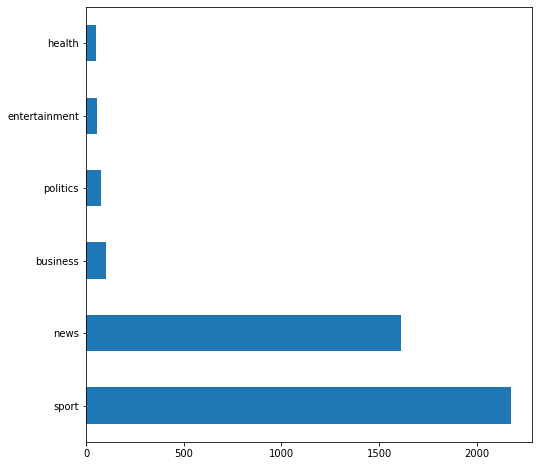

In [38]:
final_df['Category'].value_counts().plot(kind='barh', figsize=(8, 8));

In [ ]:
plt

In [12]:
desc_new_lem = []
lem = WordNetLemmatizer()
for each_row in post_new_alpha:
    desc_new_lem.append([lem.lemmatize(word) for word in each_row])

final_df["Description_token_cleaned"] = desc_new_lem
final_df["Description_token_cleaned"] = [
    " ".join(desc) for desc in final_df['Description_token'].values]


C:\Users\sunil\AppData\Local\Temp\ipykernel_22628\1122009250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Description_token_cleaned"] = desc_new_lem
C:\Users\sunil\AppData\Local\Temp\ipykernel_22628\1122009250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Description_token_cleaned"] = [


In [13]:
final_df.drop(["Description", "Description_token"], axis=1, inplace=True)


C:\Users\sunil\AppData\Local\Temp\ipykernel_22628\2200273844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(["Description", "Description_token"], axis=1, inplace=True)


In [14]:
final_df.head()

,Category,Description_token_cleaned
0,news,The e-commerce boom has exacerbated a global t...
1,news,Working in a factory can mean doing the same t...
2,news,"In a Hong Kong warehouse , a swarm of autonomo..."
3,business,"For many years , the world 's most popular eme..."
4,business,The European Union formally approved on Tuesda...


In [15]:
tfi = TfidfVectorizer(max_features=1000)
x = tfi.fit_transform(final_df["Description_token_cleaned"]).toarray()
X = pd.DataFrame(x)

In [16]:
y = np.array(final_df['Category'])


In [21]:
cat = len(pd.unique(y))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [31]:
model = KMeans(init='random', n_clusters=cat, n_init=100, max_iter=300, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


InvalidIndexError: (slice(None, None, None), 0)

In [23]:

sum_of_squared_distances = []
K = range(1, 150)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    sum_of_squared_distances.append(km.inertia_)


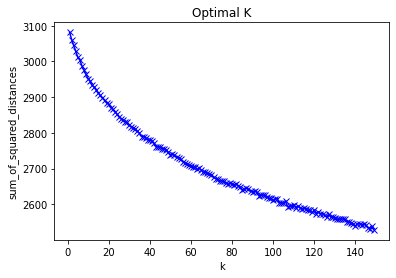

In [24]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title("Optimal K")
plt.show()